<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [4]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(housing.info())
print(housing.describe())
print(housing.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [9]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [11]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [12]:
print("Distribución de los datos (primeras 5 filas):\n", digits.head())

print("\nUso de memoria:\n", digits.info())

print("\nTipos de datos:\n", digits.dtypes)

print("\nRegistros por clase:\n", digits['target'].value_counts().sort_index())

print("\nEstadísticas de resumen:\n", digits.describe())

Distribución de los datos (primeras 5 filas):
    c00  c01  c02  c03  c04  c05  c06  c07  c08  c09  ...  c55  c56  c57  c58  \
0    0    0    5   13    9    1    0    0    0    0  ...    0    0    0    6   
1    0    0    0   12   13    5    0    0    0    0  ...    0    0    0    0   
2    0    0    0    4   15   12    0    0    0    0  ...    0    0    0    0   
3    0    0    7   15   13    1    0    0    0    8  ...    0    0    0    7   
4    0    0    0    1   11    0    0    0    0    0  ...    0    0    0    0   

   c59  c60  c61  c62  c63  target  
0   13   10    0    0    0       0  
1   11   16   10    0    0       1  
2    3   11   16    9    0       2  
3   13   13    9    0    0       3  
4    2   16    4    0    0       4  

[5 rows x 65 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     17

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [13]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

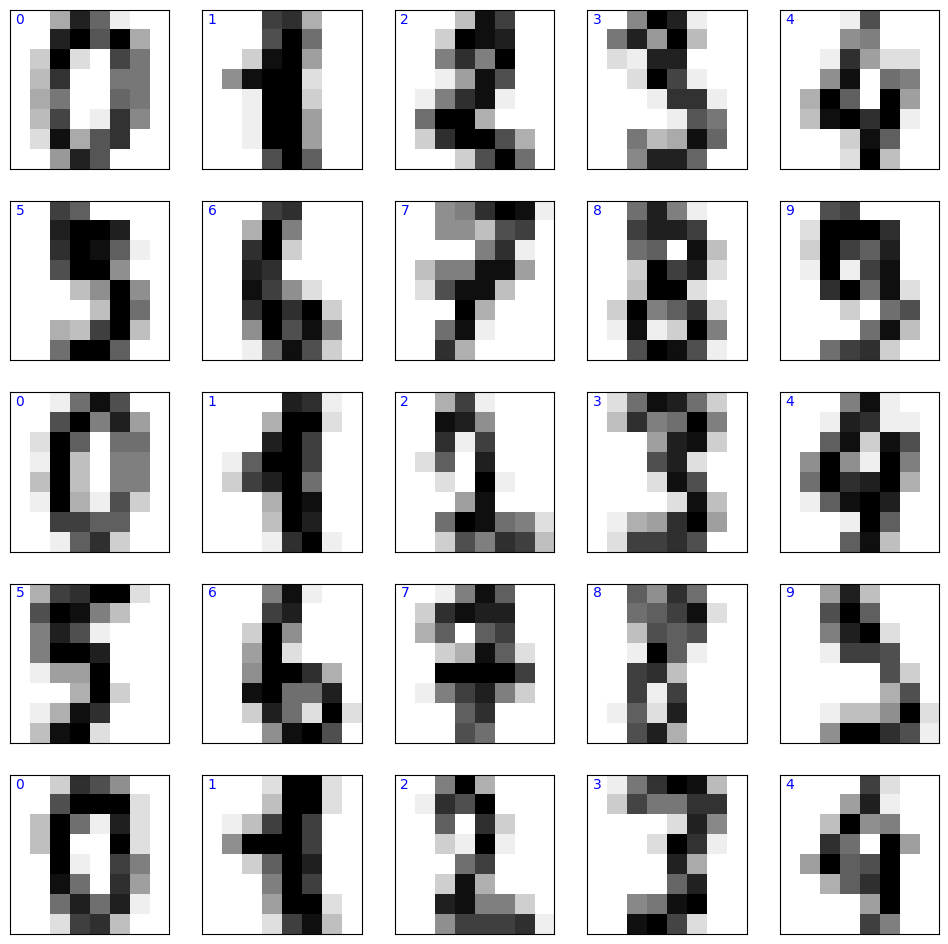

In [14]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(nx * ny):
    row = i // ny
    col = i % ny
    data = digits_dict["images"][i]
    label = str(digits_dict["target"][i])
    axs[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
    axs[row, col].text(0, 0, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)

plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [35]:
X = digits.drop(columns="target").values
y = digits["target"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Número de muestras en el conjunto de entrenamiento: {len(X_train)}")
print(f"Número de muestras en el conjunto de prueba: {len(X_test)}")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

logistic_regression_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
svm_model = SVC()

start_time_lr = time.time()
logistic_regression_model.fit(X_train, y_train)
end_time_lr = time.time()
training_time_lr = end_time_lr - start_time_lr

start_time_knn = time.time()
knn_model.fit(X_train, y_train)
end_time_knn = time.time()
training_time_knn = end_time_knn - start_time_knn

start_time_svm = time.time()
svm_model.fit(X_train, y_train)
end_time_svm = time.time()
training_time_svm = end_time_svm - start_time_svm

print(f"\nTiempo de entrenamiento Regresión Logística: {training_time_lr:.4f} segundos")
print(f"Tiempo de entrenamiento K-Nearest Neighbors: {training_time_knn:.4f} segundos")
print(f"Tiempo de entrenamiento Support Vector Machine: {training_time_svm:.4f} segundos")

Número de muestras en el conjunto de entrenamiento: 1347
Número de muestras en el conjunto de prueba: 450

Tiempo de entrenamiento Regresión Logística: 2.9227 segundos
Tiempo de entrenamiento K-Nearest Neighbors: 0.0054 segundos
Tiempo de entrenamiento Support Vector Machine: 0.1386 segundos


Métricas para Regresión Logística:
Accuracy: 0.9733
Precision: 0.9736
Recall: 0.9733
F1-score: 0.9734


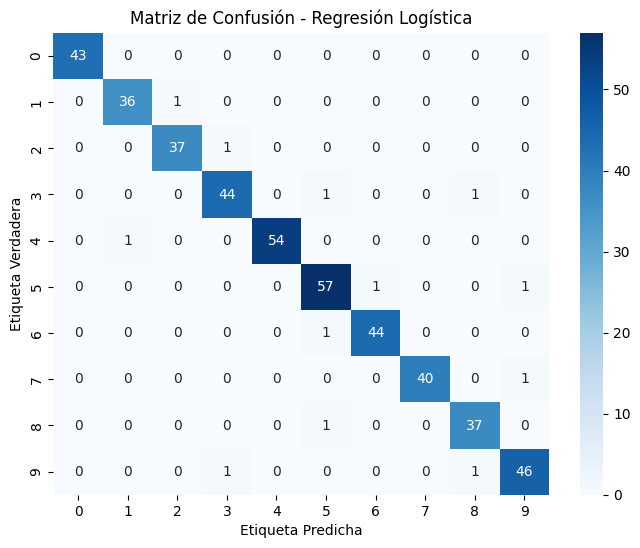

In [32]:
# Métricas y matriz de confusión para Regresión Logística
y_pred_lr = logistic_regression_model.predict(X_test)

print("Métricas para Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Métricas para K-Nearest Neighbors:
Accuracy: 0.9933
Precision: 0.9933
Recall: 0.9933
F1-score: 0.9933


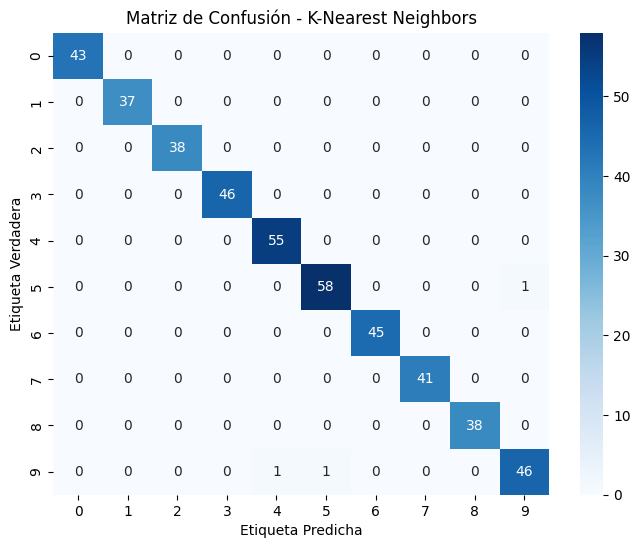

In [28]:
# Métricas y matriz de confusión para K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)

print("Métricas para K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Métricas para Support Vector Machine:
Accuracy: 0.9867
Precision: 0.9867
Recall: 0.9867
F1-score: 0.9867


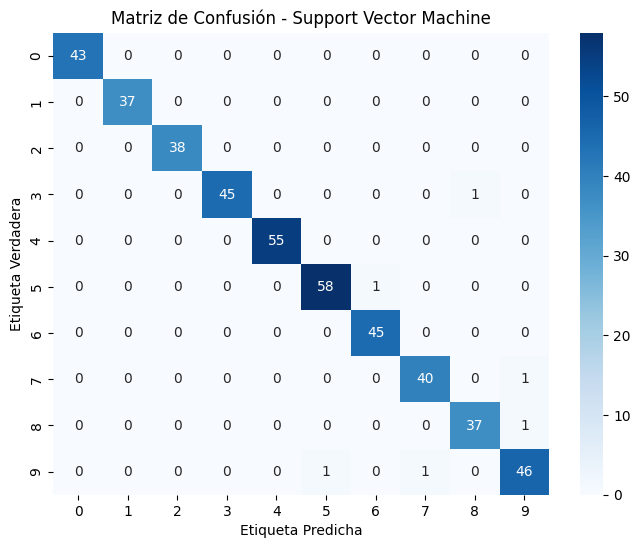

In [29]:
# Métricas y matriz de confusión para Support Vector Machine
y_pred_svm = svm_model.predict(X_test)

print("Métricas para Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Support Vector Machine')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

**Análisis de Métricas de Error y Matriz de Confusión**

Se han calculado y visualizado las métricas de rendimiento (Accuracy, Precision, Recall, F1-score) y las matrices de confusión para los tres modelos entrenados: Regresión Logística, K-Nearest Neighbors y Support Vector Machine.

Las métricas proporcionan una evaluación cuantitativa del desempeño de cada modelo en la clasificación de los dígitos. La matriz de confusión, por su parte, ofrece una representación visual de los aciertos y errores de cada modelo por clase, mostrando cuántas veces se clasificó incorrectamente un dígito como otro.

Un análisis detallado de estas métricas y matrices permitirá determinar cuál de los modelos tiene el mejor rendimiento general y dónde presentan mayores dificultades en la clasificación.

**Análisis y Selección del Modelo**

Basándonos en las métricas de rendimiento obtenidas:

*   **Regresión Logística:** Accuracy: 0.9733, Precision: 0.9736, Recall: 0.9733, F1-score: 0.9734
*   **K-Nearest Neighbors:** Accuracy: 0.9933, Precision: 0.9933, Recall: 0.9933, F1-score: 0.9933
*   **Support Vector Machine:** Accuracy: 0.9867, Precision: 0.9867, Recall: 0.9867, F1-score: 0.9867

Y los tiempos de entrenamiento:

*   **Regresión Logística:** Aproximadamente 2.92 segundos
*   **K-Nearest Neighbors:** Aproximadamente 0.005 segundos
*   **Support Vector Machine:** Aproximadamente 0.14 segundos

Respondiendo a las preguntas:

*   **¿Cuál modelo es mejor basado en sus métricas?**
    El modelo **K-Nearest Neighbors** presenta las métricas de rendimiento más altas (Accuracy, Precision, Recall y F1-score de 0.9933), lo que indica que es el que mejor predice los dígitos en este conjunto de datos de prueba.

*   **¿Cuál modelo demora menos tiempo en ajustarse?**
    El modelo **K-Nearest Neighbors** es significativamente más rápido en ajustarse, con un tiempo de entrenamiento de aproximadamente 0.005 segundos.

*   **¿Qué modelo escoges?**
    Considerando tanto el rendimiento (métricas) como la eficiencia (tiempo de entrenamiento), el modelo **K-Nearest Neighbors** es la mejor opción. Ofrece el mejor rendimiento de clasificación y es, con diferencia, el más rápido de entrenar. Por lo tanto, **escojo el modelo K-Nearest Neighbors** para esta tarea.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

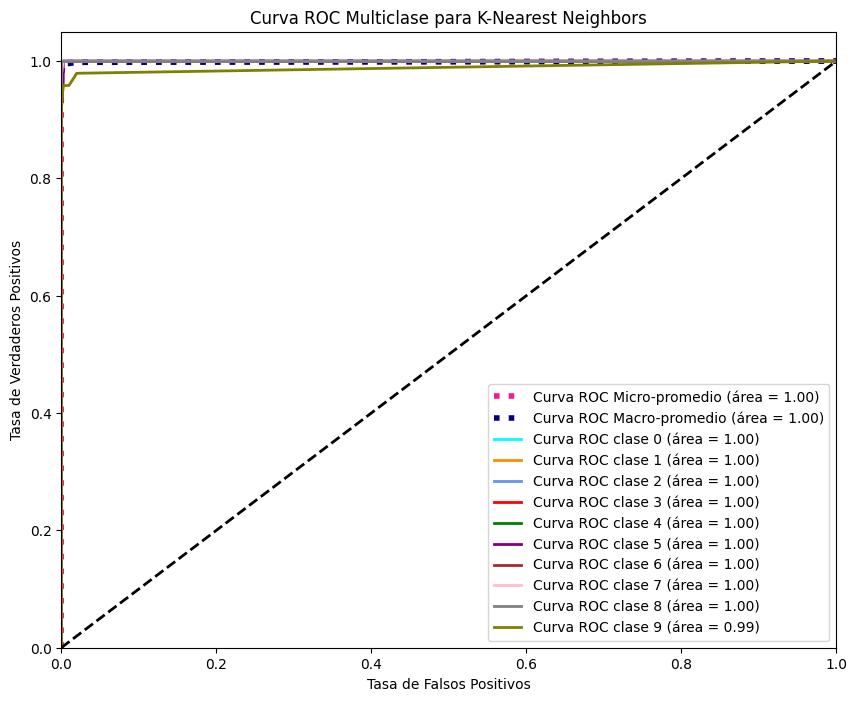

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

if hasattr(knn_model, "predict_proba"):
    y_score = knn_model.predict_proba(X_test)
elif hasattr(knn_model, "decision_function"):
     y_score = knn_model.decision_function(X_test)
else:
    raise AttributeError("El modelo KNN no tiene 'predict_proba' ni 'decision_function'")

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Curva ROC Micro-promedio (área = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Curva ROC Macro-promedio (área = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC clase {i} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase para K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

Basándonos en el gráfico de la curva ROC multiclase para el modelo K-Nearest Neighbors y las áreas bajo la curva (AUC) calculadas:

Las curvas ROC para la mayoría de las clases se acercan a la esquina superior izquierda del gráfico, y los valores de AUC para las clases individuales y los promedios micro y macro son cercanos a 1. Esto indica que el modelo KNN tiene una alta capacidad para distinguir correctamente entre las diferentes clases de dígitos.
Un área bajo la curva (AUC) cercana a 1 sugiere que el modelo tiene una excelente capacidad de clasificación, con una alta tasa de verdaderos positivos y una baja tasa de falsos positivos. Los valores de AUC obtenidos (tanto micro como macro promedio) confirman el buen rendimiento general del modelo.
La curva micro-promedio muestra el rendimiento del modelo considerando cada instancia individualmente, mientras que la curva macro-promedio da el mismo peso a cada clase. Valores altos en ambas indican un buen rendimiento tanto a nivel global como a nivel de cada clase.
En conclusión, el gráfico de la curva ROC y los valores de AUC respaldan las métricas de evaluación obtenidas anteriormente (Accuracy, Precision, Recall, F1-score) y confirman que el modelo K-Nearest Neighbors es un clasificador muy efectivo para este conjunto de datos de dígitos escritos a mano.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [37]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

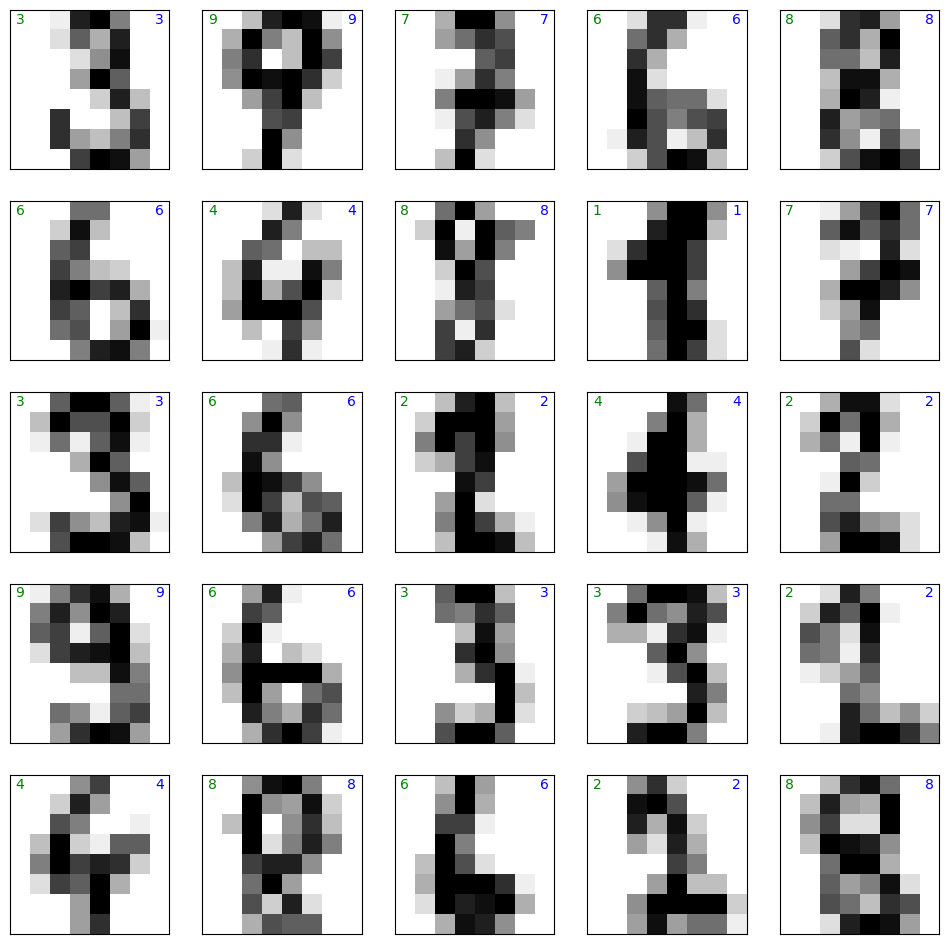

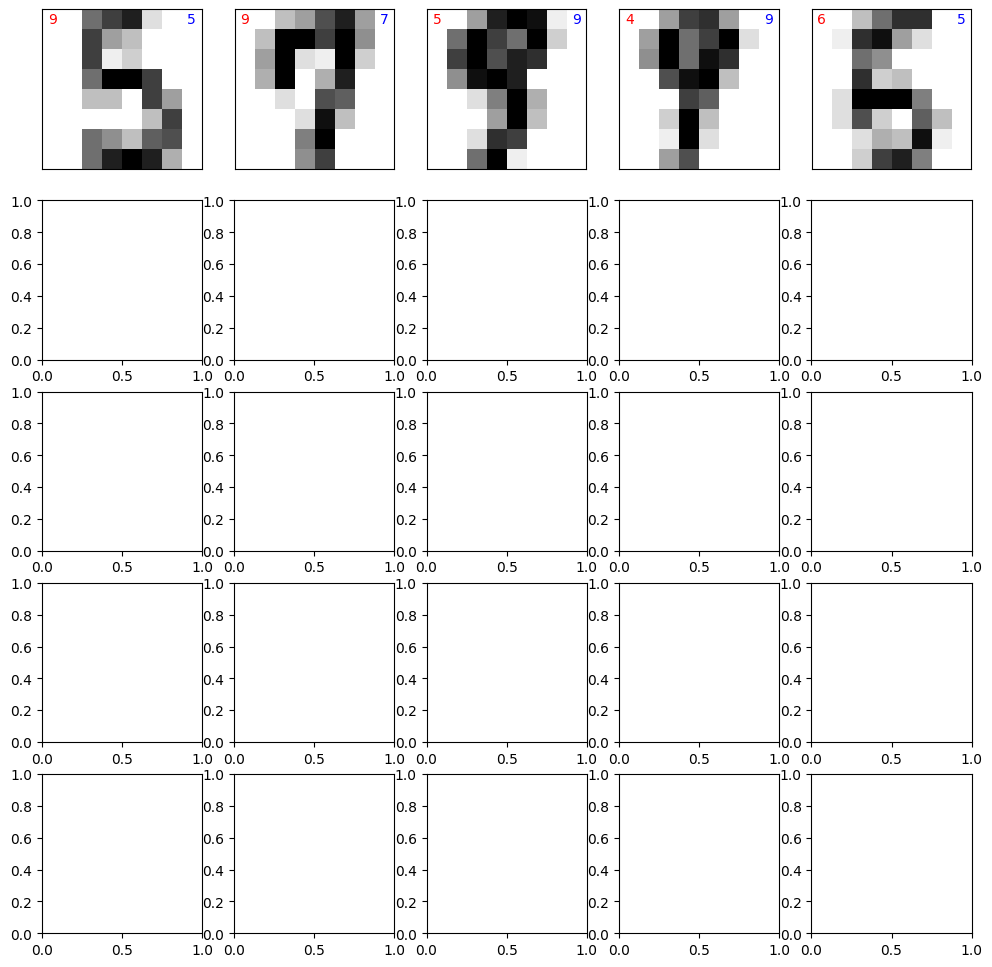

In [38]:
# Mostrar resultados correctos
mostrar_resultados(digits, knn_model, label="correctos")

# Mostrar resultados incorrectos
mostrar_resultados(digits, knn_model, label="incorrectos")

Las fallas en la clasificación del modelo K-Nearest Neighbors, es decir, cuando el valor predicho y el original son distintos, pueden ocurrir por varias razones:

Similitud visual entre dígitos: Algunos dígitos escritos a mano pueden ser muy similares entre sí (por ejemplo, un 7 y un 9, o un 4 y un 9), lo que puede confundir al modelo al basarse en la proximidad de los píxeles.
Variabilidad en la escritura a mano: La forma en que las personas escriben los dígitos varía considerablemente. Diferentes estilos, grosores de trazo, inclinaciones o tamaños pueden hacer que un dígito se parezca más a otro para el algoritmo KNN.
Ruido en los datos: Aunque el dataset ha sido preprocesado, podría haber pequeñas variaciones o "ruido" en los datos de píxeles que afecten la distancia calculada por el modelo.
Elección del número de vecinos (k): El rendimiento de KNN es sensible al número de vecinos considerados (n_neighbors). Un valor de k inapropiado podría llevar a clasificaciones incorrectas, especialmente en los límites entre clases.
Muestras atípicas o ambiguas: Algunas imágenes de dígitos pueden ser inusualmente formadas o ambiguas, lo que dificulta incluso para un humano determinar el dígito correcto y, por lo tanto, para el modelo clasificarlo correctamente.
Al visualizar las predicciones incorrectas, a menudo se puede observar que las imágenes mal clasificadas son ejemplos donde los dígitos son particularmente difíciles de reconocer o se parecen superficialmente a otro dígito.



### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

### Ejercicio 6: Conclusiones

El presente laboratorio abordó la aplicación de técnicas de Machine Learning para un problema de clasificación de dígitos escritos a mano. A lo largo de las distintas etapas, se realizó un análisis exploratorio de los datos, se visualizaron ejemplos de los dígitos, se entrenaron y evaluaron diferentes modelos de clasificación, y se profundizó en la comprensión del modelo seleccionado.

En la fase de exploración de datos (Ejercicio 1), se determinó la estructura del conjunto de datos, el uso de memoria, los tipos de datos y la distribución de instancias por clase. Se confirmó que el dataset está balanceado y que los valores de píxeles se encuentran dentro del rango esperado.

La visualización de los dígitos (Ejercicio 2) permitió apreciar la variabilidad en la escritura y la posible ambigüedad de algunas imágenes, lo cual anticipaba la probabilidad de errores en la clasificación.

En el Ejercicio 3, se entrenaron tres modelos de clasificación: Regresión Logística, K-Nearest Neighbors y Support Vector Machine. La evaluación basada en métricas como Accuracy, Precision, Recall y F1-score, junto con la medición del tiempo de entrenamiento, reveló que el modelo **K-Nearest Neighbors** obtuvo el mejor rendimiento general con métricas superiores y un tiempo de ajuste significativamente menor en comparación con los otros modelos.

El análisis de la curva AUC-ROC para el modelo K-Nearest Neighbors en el Ejercicio 4 confirmó su alta capacidad discriminatoria, con valores de AUC cercanos a 1, lo que indica una excelente habilidad para distinguir entre las diferentes clases de dígitos.

Finalmente, la visualización de las predicciones (Ejercicio 5) mostró que el modelo KNN clasifica correctamente la gran mayoría de los dígitos. Las fallas observadas se atribuyen principalmente a la similitud visual entre ciertos dígitos y a la inherente variabilidad en la escritura a mano.

Como trabajo futuro, se recomienda explorar la optimización de hiperparámetros del modelo KNN, evaluar el desempeño de otros algoritmos de clasificación avanzados y considerar técnicas de preprocesamiento de imágenes para potencialmente mejorar la precisión del modelo.

En conclusión, el modelo K-Nearest Neighbors demostró ser el más adecuado para la tarea de clasificación de dígitos en este conjunto de datos, ofreciendo un equilibrio óptimo entre rendimiento y eficiencia computacional. Si bien se lograron resultados satisfactorios, la naturaleza del problema presenta desafíos inherentes que podrían abordarse con enfoques más sofisticados en futuras iteraciones.